In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.spatial.distance import cdist
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline

## K-means Clustering

### Implementing K-means

In [2]:
data = loadmat('ex7/ex7data2.mat')
X = data['X']

In [3]:
# Finding closest centroids

def findClosestCentroids(X, centroids):
    # X: (m, n); centroids: (k, n)
    dist = cdist(X, centroids, metric='euclidean') # m x k
    return np.argmin(dist, axis=1)

In [4]:
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [5]:
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples: {} (should be 0, 2, 1)".format(idx[:3]))

Closest centroids for the first 3 examples: [0 2 1] (should be 0, 2, 1)


In [6]:
# Computing centroid means

def computeCentroids(X, idx, K):
    # X: (m, n); idx: (m, ); K: int
    centroids = np.zeros([K, X.shape[1]])
    for i in range(K):
        centroids[i] = np.mean(X[idx==i], axis=0)
    return centroids

In [7]:
centroids = computeCentroids(X, idx, K)
print('Centroids computed after initial finding of closest centroids: \n{}'.format(centroids))
print('The centroids should be {}'.format([[2.42,3.15],[5.81,2.63],[7.12,3.62]]))

Centroids computed after initial finding of closest centroids: 
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]
The centroids should be [[2.42, 3.15], [5.81, 2.63], [7.12, 3.62]]


### K-means on example dataset

In [8]:
def runKMeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        centroids = computeCentroids(X, idx, K)
    return (centroids, idx)

In [9]:
def plotProgresskMeans(X, centroids, previous_centroids, idx, K, i):
    plt.scatter(X[:,0], X[:,1], c=idx)
    plt.title('Figure 1: The expected output.')
    for j in range(K):
        plt.plot([centroids[j,0], previous_centroids[j,0]], 
                 [centroids[j,1], previous_centroids[j,1]], marker='x', color='k')

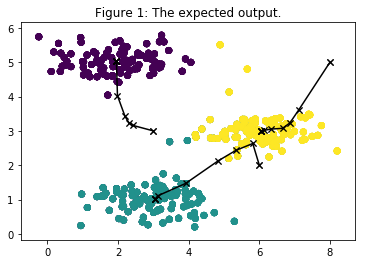

In [10]:
K = 3
max_iters = 10
initial_centroids = np.array([[3,3], [6,2], [8,5]])

centroids, idx = runKMeans(X, initial_centroids, max_iters, plot_progress=True)

### Random initialization

In [11]:
def kMeansInitCentroids(X, K):
    randidx = np.random.choice(np.arange(X.shape[0]), size=K, replace=False)
    return X[randidx,:] 

### Image compression with K-means

(128, 128, 3)


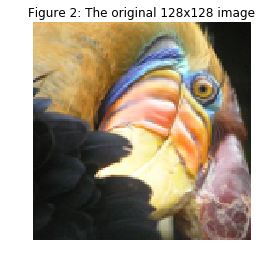

In [12]:
A = imread('ex7/bird_small.png')
print(A.shape)

plt.imshow(A)
plt.title('Figure 2: The original 128x128 image')
plt.axis('off')
plt.show()

In [13]:
A = A / 255 # divide by 255 so that all values are in the range 0 - 1
X = A.reshape([-1, 3])
print(X.shape)

(16384, 3)


In [14]:
# K-means on pixels
K = 16
max_iters = 10

initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runKMeans(X, initial_centroids, max_iters)

In [15]:
idx = findClosestCentroids(X, centroids)

In [16]:
X_recovered = centroids[idx,:]
X_recovered = X_recovered.reshape(A.shape)
print(X_recovered.shape)

(128, 128, 3)


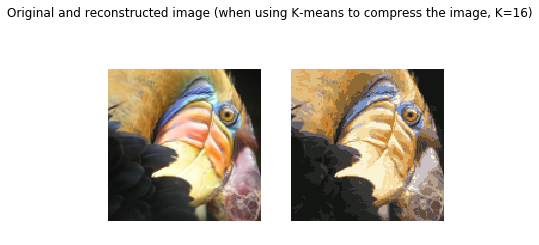

In [17]:
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.axis('off')
plt.suptitle('Original and reconstructed image (when using K-means to compress the image, K=16)')
plt.show()

## Principal Component Analysis

### Example Dataset

In [18]:
data = loadmat('ex7/ex7data1.mat')
X = data['X']

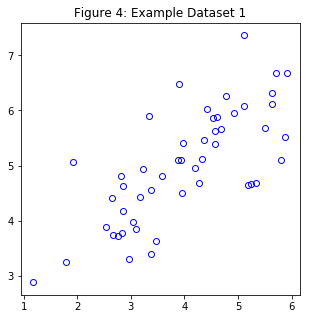

In [19]:
plt.figure(figsize=(5,5))
plt.plot(X[:,0], X[:,1], 'bo', mfc='none')
plt.title('Figure 4: Example Dataset 1')
plt.show()

### Implementing PCA

In [20]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / (sigma) # to avoid divide by zero
    return (X_norm, mu, sigma)

In [21]:
X_norm, mu, sigma = featureNormalize(X)

In [22]:
def pca(X):
    m = X.shape[0]
    cov = np.dot(X.T, X) / m
    U, S, V = np.linalg.svd(cov)
    return (U, S)

In [23]:
U, S = pca(X_norm)
print("Top eigenvector: {}".format(U[:, 0]))
print("You should expect to see -0.707107 -0.707107")

Top eigenvector: [-0.70710678 -0.70710678]
You should expect to see -0.707107 -0.707107


In [24]:
pc1 = mu + 1.5 * S[0] * U[:,0]
pc2 = mu + 1.5 * S[1] * U[:,1]

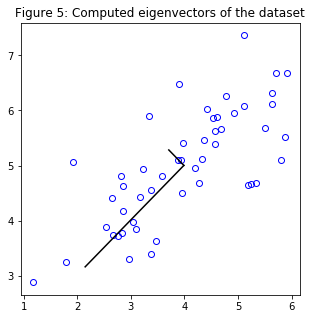

In [25]:
plt.figure(figsize=(5,5))
plt.plot(X[:,0], X[:,1], 'bo', mfc='none')
plt.plot([mu[0], pc1[0]], [mu[1], pc1[1]], color='k')
plt.plot([mu[0], pc2[0]], [mu[1], pc2[1]], color='k')
plt.title('Figure 5: Computed eigenvectors of the dataset')
plt.show()

## Dimensionality Reduction with PCA

In [26]:
# Projecting the data onto the principal components
def projectData(X, U, K):
    U_reduce = U[:,:K]
    return np.dot(X, U_reduce)

In [27]:
K = 1

Z = projectData(X_norm, U, K)
print("Projection of the first example: {}".format(Z[0]))
print("(this value should be about 1.481274)")

Projection of the first example: [ 1.49631261]
(this value should be about 1.481274)


In [28]:
# Reconstructing an approximation of the data
def recoverData(Z, U, K):
    U_reduce = U[:,:K]
    return np.dot(Z, U_reduce.T)

In [29]:
X_rec = recoverData(Z, U, K)
print("Approximation of the first example: {}".format(X_rec[0]))
print("(this value should be about -1.047419 -1.047419)")

Approximation of the first example: [-1.05805279 -1.05805279]
(this value should be about -1.047419 -1.047419)


### Visualizing the projections

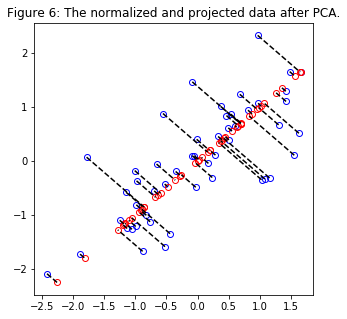

In [30]:
plt.figure(figsize=(5,5))
plt.plot(X_norm[:,0], X_norm[:,1], 'bo', mfc='none')
plt.plot(X_rec[:,0], X_rec[:,1], 'ro', mfc='none')
for i in range(X_norm.shape[0]):
    plt.plot([X_norm[i,0],X_rec[i,0]], [X_norm[i,1],X_rec[i,1]], 'k--')
plt.title('Figure 6: The normalized and projected data after PCA.')
plt.show()

### Face Image Dataset

In [31]:
data = loadmat('ex7/ex7faces.mat')
X = data['X']
print(X.shape)

(5000, 1024)


In [32]:
# https://github.com/kaleko/CourseraML/blob/master/ex7/ex7.ipynb
def displayData(X, title='', rows=10, cols=10):
    canvas = np.zeros([32*rows,32*cols])
    
    irow, icol = 0, 0
    for i in range(rows*cols):
        if icol == cols:
            irow += 1
            icol  = 0
        xi = X[i].reshape(32,32).T
        ul, ll, ur, lr = 32*irow, 32*(irow+1), 32*icol, 32*(icol+1)
        canvas[ul:ll, ur:lr] = xi
        icol += 1
    fig = plt.figure(figsize=(6,6))
    #img = scipy.misc.toimage( canvas )
    plt.imshow(canvas, cmap='gray')
    plt.axis('off')
    plt.title(title)

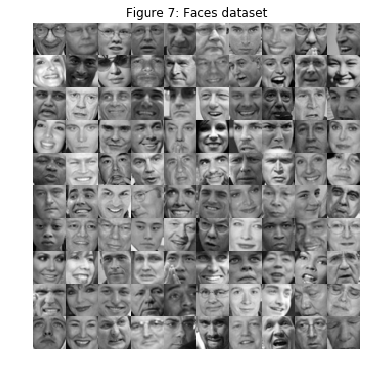

In [33]:
displayData(X[:100], 'Figure 7: Faces dataset')

In [34]:
# PCA on Faces
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)

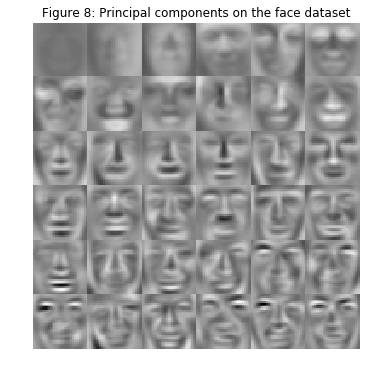

In [35]:
displayData(U[:, :36].T, 'Figure 8: Principal components on the face dataset', 6, 6)

In [36]:
# Dimensionality Reduction
K = 100
Z = projectData(X_norm, U, K)
print("The projected data Z has a size of: {}".format(Z.shape))

The projected data Z has a size of: (5000, 100)


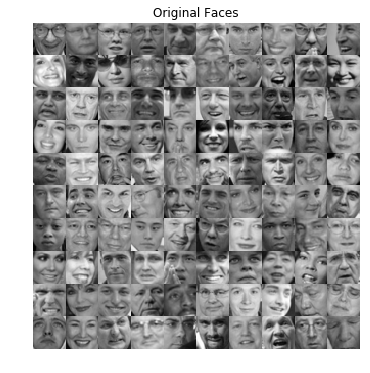

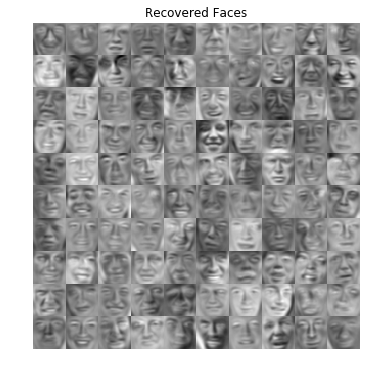

In [37]:
X_rec = recoverData(Z, U, K)

displayData(X[:100], 'Original Faces')
displayData(X_rec[:100], 'Recovered Faces')

### PCA for visualization

In [38]:
from mpl_toolkits.mplot3d import Axes3D

In [39]:
# load data and run kmeans to group pixel colors
A = imread('ex7/bird_small.png')
A = A / 255
X = A.reshape([-1, 3])

K = 16
max_iter = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runKMeans(X, initial_centroids, max_iter)

In [40]:
sel = np.random.choice(np.arange(X.shape[0]), size=1000)

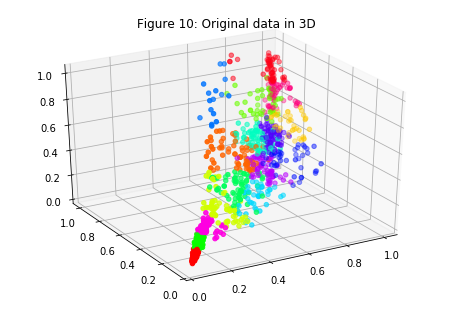

In [41]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(azim=-120)
ax.scatter(X[sel,0],X[sel,1],X[sel,2], c=idx[sel], cmap='hsv')
plt.title("Figure 10: Original data in 3D")
plt.show()

In [42]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

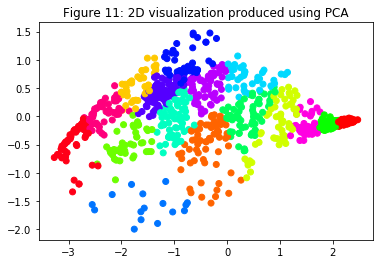

In [43]:
plt.scatter(Z[sel,0], Z[sel,1], c=idx[sel], cmap='hsv')
plt.title("Figure 11: 2D visualization produced using PCA")
plt.show()